In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn import linear_model

In [9]:
#load the dataset
data = np.loadtxt('ex2data2.txt', delimiter=',')

X = data[:, 0:2]
y = data[:, 2]
print("X: " + str(X.shape))
print("y: " + str(y.shape))

X: (118, 2)
y: (118,)


In [10]:
def map_feature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

it = map_feature(X[:, 0], X[:, 1])
print(it.shape)

(118, 28)


In [11]:
regr = linear_model.LinearRegression()
regr.fit(it, y)
theta = regr.get_params

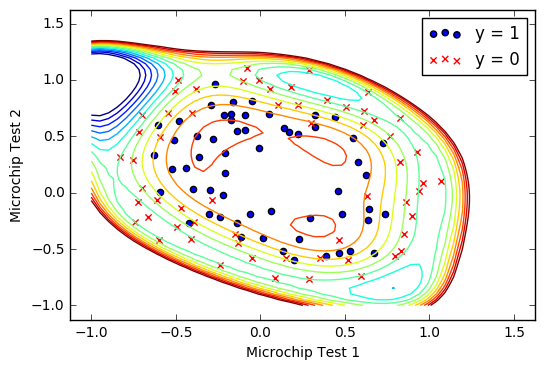

In [12]:
#Plot Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        mf = map_feature(np.array(u[i]), np.array(v[j]))
        # z[i, j] = mf.dot(np.array(theta))
        z[i,j] = regr.predict(mf)

z = z.T
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
levels = np.arange(-1.2, 1.6, 0.2)
plt.contour(u, v, z, levels)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.show()